## **Author - Rupa Navale**
## **Oasis Infobyte Internship - July P2 Batch**
## **Data Science Intern**

## **Task: Unemployment Analysis With Python**
### **Objective:**
Explore the impact of Covid-19 lockdown on employment opportunities and analyze the resulting surge in unemployment rate

## **Index:**
#### **Step 1**: Import the necessary libraries    
#### **Step 2**: Load & explore the dataset
#### **Step 3**: Data Preprocessing
#### **Step 4**: Data Visualization
#### **Step 5**: Conclusion


## **Step 1: Import the necessary libraries:**

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files

## **Step 2: Load & explore the dataset:**

In [3]:
uploaded = files.upload()

Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [5]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [6]:
# Discovering number of rows & columns:
df.shape

(267, 9)

In [7]:
# Basic summary about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
# Statistical exploration of dataset:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [9]:
# Checking for null values:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [10]:
#drop null values:
df.dropna(inplace=True)

## **Step 3: Data Preprocessing:**

In [11]:
# Updating column names:

df.columns = df.columns.str.strip()  # Remove leading and trailing whitespaces from column names

# Renaming column names:
df.rename(columns={
    'Region': 'State',
    'Date': 'Date',
    'Frequency': 'Frequency',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labor_Participation_Rate',
    'Region.1': 'Region',
    'Longitude': 'Latitude',
    'Latitude': 'Longitude'
}, inplace=True)

df

,State,Date,Frequency,Unemployment_Rate,Employed,Labor_Participation_Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [17]:
df.State.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: State, dtype: int64

In [13]:
# Converting 'Date' column to datetime:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

# Creating a new column for the month
df['Month'] = df['Date'].dt.month

print(df.head())

            State       Date Frequency  Unemployment_Rate  Employed  \
0  Andhra Pradesh 2020-01-31         M               5.48  16635535   
1  Andhra Pradesh 2020-02-29         M               5.83  16545652   
2  Andhra Pradesh 2020-03-31         M               5.79  15881197   
3  Andhra Pradesh 2020-04-30         M              20.51  11336911   
4  Andhra Pradesh 2020-05-31         M              17.43  12988845   

   Labor_Participation_Rate Region  longitude  latitude  Month  
0                     41.02  South    15.9129     79.74      1  
1                     40.90  South    15.9129     79.74      2  
2                     39.18  South    15.9129     79.74      3  
3                     33.10  South    15.9129     79.74      4  
4                     36.46  South    15.9129     79.74      5  


## **Step 4: Data Visualization:**

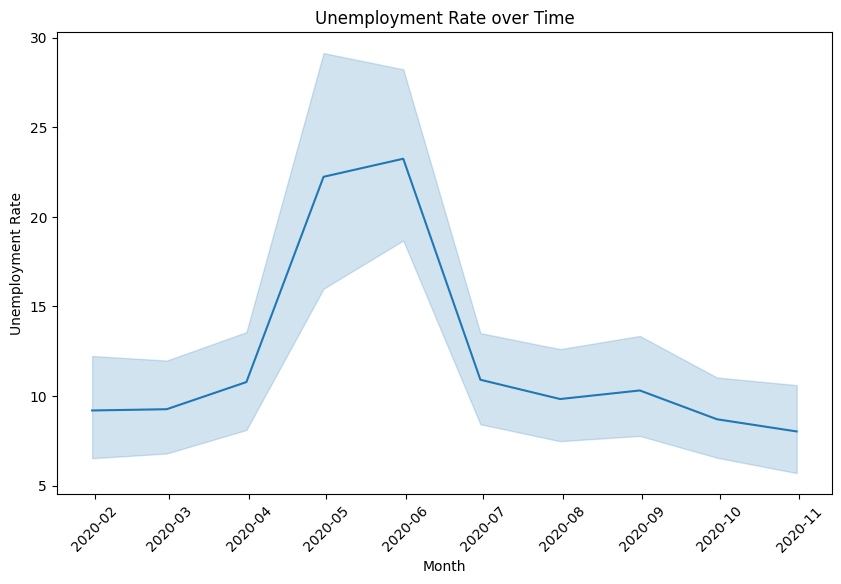

In [18]:
# Line plot of Unemployment Rate over time (Date)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

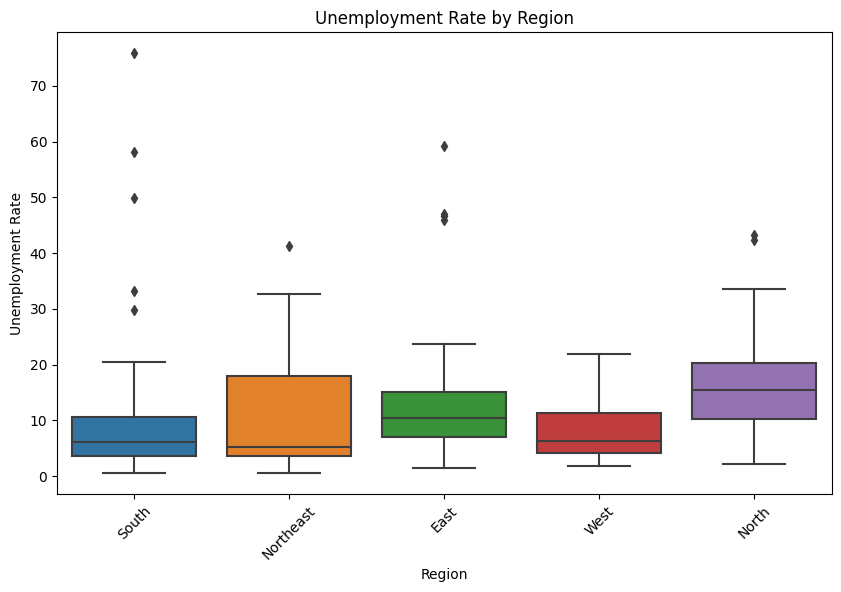

In [19]:
# Box plot of Unemployment Rate by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

<Axes: >

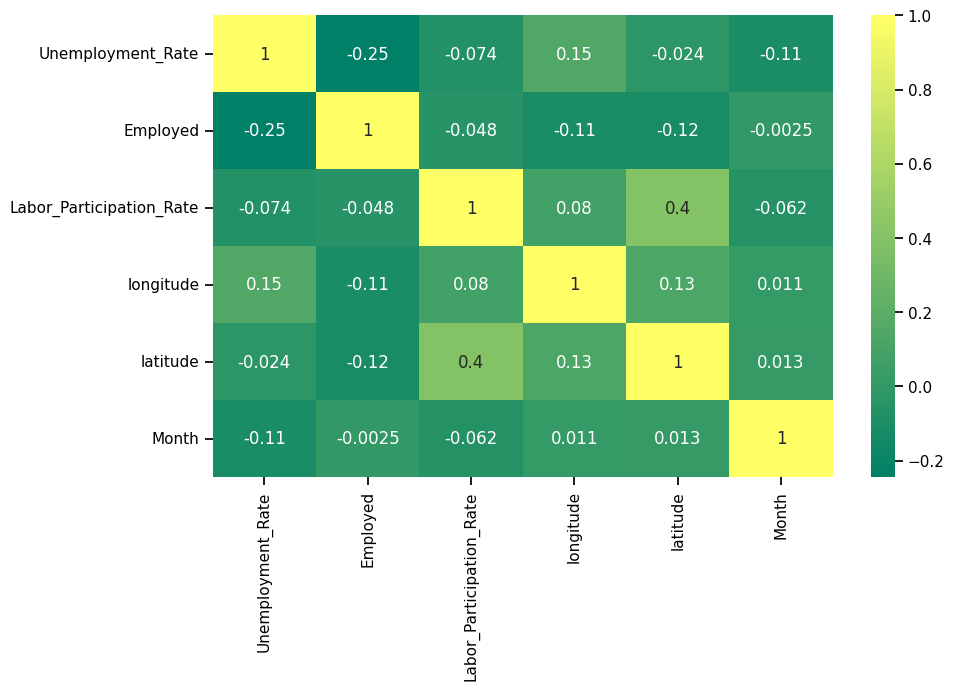

In [27]:
# Correlation Heatmap

heat_maps = df[['Unemployment_Rate', 'Employed', 'Labor_Participation_Rate', 'longitude', 'latitude', 'Month']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')

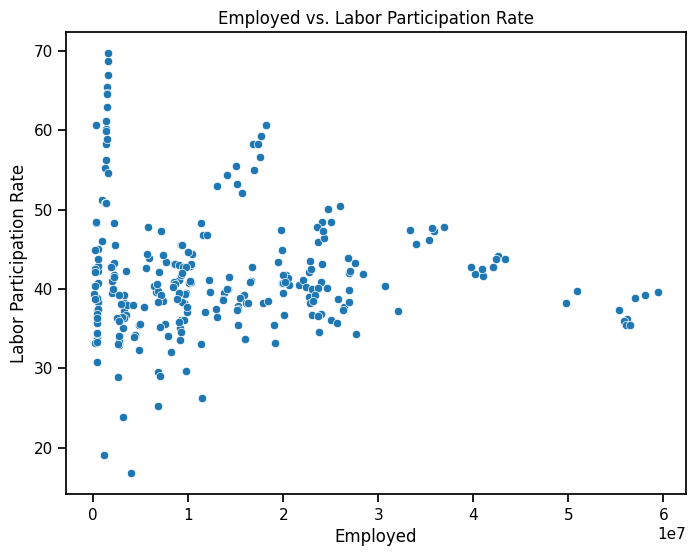

In [33]:
# Scatter plot of Employed vs. Labor Participation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Employed', y='Labor_Participation_Rate', data=df)
plt.title('Employed vs. Labor Participation Rate')
plt.xlabel('Employed')
plt.ylabel('Labor Participation Rate')
plt.show()

In [35]:
fig = px.scatter_geo(df,
                     lat='longitude', lon='latitude', color="State",
                     hover_name="State", size="Unemployment_Rate",
                     animation_frame="Month", scope='asia',
                     title='Impact of Lockdown on Employment in India',
                     projection='natural earth',
                     color_continuous_scale='viridis',
                     size_max=30)
fig.update_geos(
    showcoastlines=True, coastlinecolor="RebeccaPurple", coastlinewidth=1,
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showcountries=True, countrycolor="Black", countrywidth=1,
    showlakes=True, lakecolor="LightBlue"
)

# Setting center around India and increase the scale for closer view
fig.update_geos(center=dict(lon=78, lat=23), projection_scale=4)

fig.show()

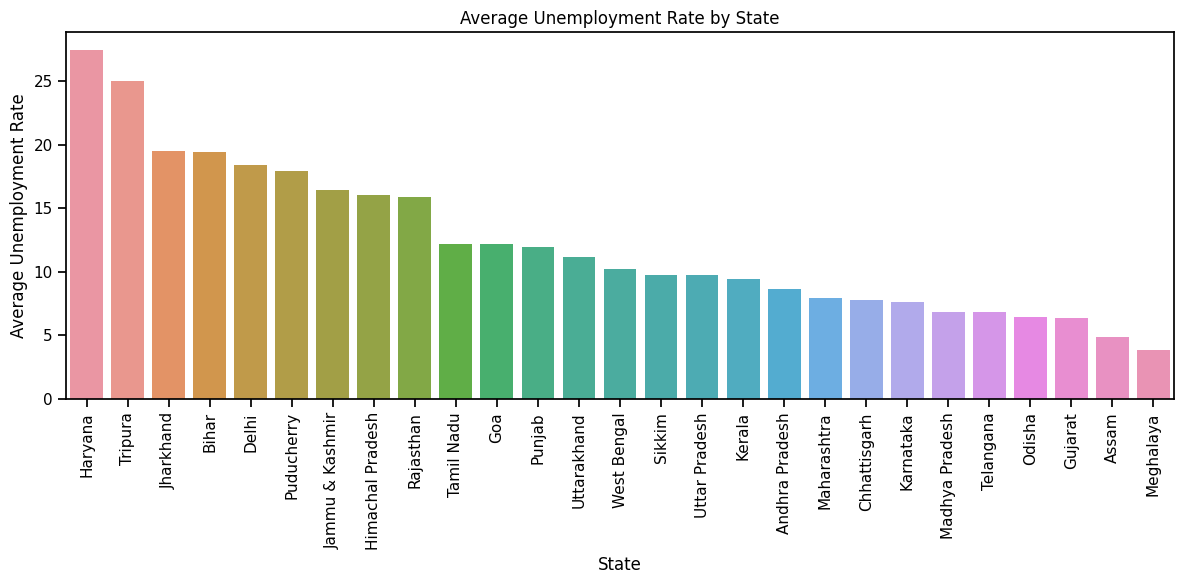

In [36]:

state_unemployment = df.groupby('State')['Unemployment_Rate'].mean().reset_index()

# Sort the data in descending order to find the state with the highest unemployment rate
state_unemployment_sorted = state_unemployment.sort_values(by='Unemployment_Rate', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Unemployment_Rate', data=state_unemployment_sorted)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by State')
plt.tight_layout()
plt.show()

## **Step 5: Conclusion:**

Based on the EDA and the visualizations of the unemployment rate data, we can draw the following conclusions:

**Urban Areas:**

The analysis indicates that most of the high unemployment rates are observed in urban areas. This could be attributed to various factors such as a higher population density, more industries, and a larger labor force competing for limited job opportunities.


**Regional Variation:**

The southern region of India shows a higher average unemployment rate compared to other regions. This regional disparity may be influenced by economic and industrial variations across different parts of the country.


**States with Highest Unemployment Rates:**

The top five states with the highest average unemployment rates are Haryana, Tripura, Jharkhand, Bihar, and Delhi. These states might be facing specific economic challenges and job market issues, contributing to elevated unemployment rates.

